# Exploratory Data Analysis for House Price Prediction in Seattle Area
There is a request on Seattle House Price Prediction, from a real estate company, that focusing on constructing, selling and managing properties. They would like to see the key factors that will affect the selling price. Although they hire experienced appraiser for working on this task; the Sr. management seeks the possible alternative to verify the conclusions from appraiser, continuously predict future house pricing trend, and provide immediate ball-pack sell pricing in case of customized building houses.
<img src='https://www.networkauctions.co.uk/images/house%20prices%20up.jpg' />


## Step 0 form a technical task from business request

From data mining perspective, more specifically, we want to predict house prices based on multiple features using regression analysis.To complete the assignment we will start from perform EDA to know the data first

## Step 1 indentify data sources
To feed the modle we will develop for predicting the house price, we initially requested, and were provided, a over 20 thousands sell related records, in order to keep each of training set, validation set and test set have over 6 thousands records. For mapping purpose, we also colleted geographic info. from public sources as well. In total, we have 3 files to work on 
- /data/kc_house_data.cv
- /data/zipcode_king_city.geojson
- /zipcode_king_city.json

## Step 2  - Load data from source, and make the necessary conversion
While loading data, we need make some treatments as well
- the raw data dose not have format on date field, we need realign data back to date meanining
- some numbers in fact are string , like zipcode
- some number in fact serves as category
- eventually sor data by date

In [15]:
import pandas as pd
import numpy as np

#the raw data dose not have format on date filed, we need realign data back to date meanining
data = pd.read_csv("data/kc_house_data.csv", parse_dates = ['date'])
data['waterfront'] = data['waterfront'].astype('category')
data['view'] = data['view'].astype('category')
data['condition'] = data['condition'].astype('category')
data['grade'] = data['grade'].astype('category')
data['zipcode'] = data['zipcode'].astype(str)
data = data.sort_values('date')
data.head(20)

# how to sort in the order of date -> zipcode -> grade

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
16768,5561000190,2014-05-02,437500.0,3,2.25,1970,35100,2.0,0,0,...,9,1970,0,1977,0,98027,47.4635,-121.991,2340,35100
9596,472000620,2014-05-02,790000.0,3,2.50,2600,4750,1.0,0,0,...,9,1700,900,1951,0,98117,47.6833,-122.400,2380,4750
9587,1024069009,2014-05-02,675000.0,5,2.50,2820,67518,2.0,0,0,...,8,2820,0,1979,0,98029,47.5794,-122.025,2820,48351
20602,7853361370,2014-05-02,555000.0,4,2.50,3310,6500,2.0,0,0,...,8,3310,0,2012,0,98065,47.5150,-121.870,2380,5000
11577,5056500260,2014-05-02,440000.0,4,2.25,2160,8119,1.0,0,0,...,8,1080,1080,1966,0,98006,47.5443,-122.177,1850,9000
20559,3438501320,2014-05-02,295000.0,2,2.50,1630,1368,2.0,0,0,...,7,1280,350,2009,0,98106,47.5489,-122.363,1590,2306
18690,1737320120,2014-05-02,470000.0,5,2.50,2210,9655,1.0,0,0,...,8,1460,750,1976,0,98011,47.7698,-122.222,2080,8633
1041,7197300105,2014-05-02,550000.0,4,2.50,1940,10500,1.0,0,0,...,7,1140,800,1976,0,98052,47.6830,-122.114,2200,10500
172,1999700045,2014-05-02,313000.0,3,1.50,1340,7912,1.5,0,0,...,7,1340,0,1955,0,98133,47.7658,-122.339,1480,7940
7734,1962200037,2014-05-02,626000.0,3,2.25,1750,1572,2.5,0,0,...,9,1470,280,2005,0,98102,47.6498,-122.321,2410,3050


## Step 2 - Explore the fundamentals of dataset
Before seeking for details from the dataset, we need have an overall feeling about the data underline, including but not being limited to 
- data structure and 
- shape and 
- Basic statistics

In [11]:
print( data.shape)
print (30* '-')
print (data.dtypes)
print (120 * '-')
data.describe(include="all")

(21,)
------------------------------
object
------------------------------------------------------------------------------------------------------------------------


47.7113

id                         752000035
date             2014-05-20 00:00:00
price                         699000
bedrooms                           4
bathrooms                        2.5
sqft_living                     2650
sqft_lot                        7945
floors                             2
waterfront                         0
view                               0
condition                          3
grade                              9
sqft_above                      2650
sqft_basement                      0
yr_built                        2006
yr_renovated                       0
zipcode                        98125
lat                          47.7113
long                        -122.296
sqft_living15                   1200
sqft_lot15                      7920
Name: 13234, dtype: object


## Step 3 data visualization
Before we dive into exploring the data, we’ll want to set the context of the analysis. One good way to do this is with exploratory charts or maps. In this case, we’ll map out the positions of the houses, which will help us understand the problem we’re exploring. <br>

In the below code, we:
- Setup a map centered on King County.
- Add a marker to the map for each house sold in the area.
- Display the map.

In [27]:
# conda install -c conda-forge folium
# http://python-visualization.github.io/folium/docs-master/quickstart.html
import folium
from folium import plugins
houses_map = folium.Map( location = [data['lat'].mean(), data['long'].mean()], zoom_start = 10)
folium.Marker(location = [data['lat'].mean(), data['long'].mean()], popup='Centre Point',
              icon=folium.Icon(color='red',icon='info-sign')).add_to(houses_map)

m_cluster= plugins.MarkerCluster().add_to(houses_map)
MAX_LIMIT = 1000
counter = 0
for idx, data in data.iterrows():
    popup_msg = 'house info: Price {0} | living space {1} | basement {2} | bedrooms {3} | bathrooms {4}'.format( data['price'],data['sqft_living15'], data['sqft_basement'], data['bedrooms'], data['bathrooms'])
    folium.Marker(location = [data['lat'], data['long']], popup=popup_msg).add_to(m_cluster)
    counter = counter + 1
    if counter > MAX_LIMIT :
        break
    

houses_map.save('maps/kc_map_001.html')
houses_map

AttributeError: 'float' object has no attribute 'mean'

### The map is helpful but it's hard to see where the houses in our dataset are located. 
- Instead, we could make a heatmap:
- Heatmaps are good for mapping out gradients, but we’ll want something with more structure to plot out differences in house sale accross the county. Zip codes are a good way to visualize this information.


In [22]:
from folium import plugins
#houses_map = folium.Map( location = [data['lat'].mean(), data['long'].mean()], zoom_start = 9)
houses_map = folium.Map( location = [data['lat'].mean(), data['long'].mean()], zoom_start = 10)
#houses_heatmap = folium.Map(location = [data['lat'].mean(), data['long'].mean()], zoom_start = 9)
houses_heatmap=plugins.HeatMap([[row["lat"], row["long"]] for name, row in data.iterrows()])
houses_heatmap.add_to(houses_map)
houses_map

AttributeError: 'float' object has no attribute 'mean'

We could for example compute the mean house price by zip code, then plot this out on a map. we'll:
- group the dataframe by zipcode,
- Compute the average price of each column
- add a column with the total number of observations (i.e., house sales) per zipcode


In [19]:
zipcode_data = data.groupby('zipcode').aggregate(np.mean)
zipcode_data.reset_index(inplace=True)
    
data['count'] = 1
count_houses_zipcode = data.groupby('zipcode').sum()
count_houses_zipcode.reset_index(inplace=True)
count_houses_zipcode = count_houses_zipcode[['zipcode','count']]
data.drop(['count'], axis = 1, inplace = True)

zipcode_data = pd.merge(zipcode_data, count_houses_zipcode, how='left', on=['zipcode'])
#data.head(2)
zipcode_data.head(10)
#count_houses_zipcode.head()



,zipcode,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,sqft_basement,yr_built,yr_renovated,lat,long,sqft_living15,sqft_lot15,count
0,98001,4.664787e+09,2.808047e+05,3.383978,2.006215,1900.856354,14937.450276,1.429558,1721.325967,179.530387,1980.679558,43.801105,47.309020,-122.270646,1828.856354,11214.403315,362
1,98002,4.850894e+09,2.342840e+05,3.326633,1.839196,1627.743719,7517.633166,1.334171,1522.537688,105.206030,1967.773869,59.889447,47.308780,-122.213357,1479.030151,7585.482412,199
2,98003,4.674182e+09,2.941113e+05,3.357143,2.047321,1928.882143,10603.096429,1.310714,1663.550000,265.332143,1976.885714,21.360714,47.315741,-122.310054,1876.196429,9746.178571,280
3,98004,4.394237e+09,1.355927e+06,3.854890,2.527603,2909.022082,13104.220820,1.432177,2419.842271,489.179811,1971.470032,208.145110,47.616183,-122.205189,2674.700315,12805.022082,317
4,98005,4.961872e+09,8.101649e+05,3.851190,2.424107,2656.803571,19928.785714,1.279762,2160.196429,496.607143,1969.744048,47.630952,47.611532,-122.167268,2567.863095,18367.773810,168
5,98006,4.621241e+09,8.596848e+05,3.841365,2.555723,2888.295181,13383.435743,1.459839,2300.383534,587.911647,1978.720884,80.397590,47.558022,-122.146839,2785.612450,12159.959839,498
6,98007,4.450672e+09,6.171051e+05,3.815603,2.173759,2182.056738,10662.702128,1.411348,1885.673759,296.382979,1971.070922,56.780142,47.610522,-122.142078,2124.822695,9579.900709,141
7,98008,4.594706e+09,6.455074e+05,3.734982,2.088339,2133.445230,10188.448763,1.181979,1713.088339,420.356890,1966.325088,49.526502,47.613312,-122.115834,2021.130742,9494.996466,283
8,98010,3.879195e+09,4.236660e+05,3.290000,2.027500,2137.590000,55465.300000,1.480000,2000.340000,137.250000,1979.180000,218.370000,47.333210,-121.999470,2008.760000,47830.270000,100
9,98011,4.284961e+09,4.903515e+05,3.548718,2.278205,2253.097436,11314.138462,1.502564,1954.558974,298.538462,1982.148718,50.810256,47.755192,-122.201174,2248.076923,9512.087179,195




We’ll now be able to plot the average value of a specific attribute for each zip code. In order to do this, we’ll read data in GeoJSON format to get the shape of each zip code, then match each zip code shape with the attribute score. Let's first create a function.

In [28]:
def show_zipcode_map(col):
    geo_path = 'data/zipcode_king_city.geojson'
    zipcode = folium.Map(location=[data['lat'].mean(), data['long'].mean()], zoom_start=9)
    zipcode.choropleth(geo_data= open(geo_path).read(),
                         data=zipcode_data, 
                         columns = ['zipcode', col], key_on = 'feature.properties.ZCTA5CE10',
                         fill_color='OrRd', fill_opacity=0.9,line_opacity=0.2)
    #zipcode.save(col + '.html')
    return zipcode
show_zipcode_map('count')
show_zipcode_map('price')
show_zipcode_map('sqft_living')
show_zipcode_map('yr_built')



NameError: name 'zipcode_data' is not defined

## Step 4 working on output vaiable
Now that we've set the context by plotting out where the houses in our dataset are located, we can move into exploring different angles for our regression analysis.

Let's first display the distribution of the target column (price) using a boxplot. 

There seems to be a lot of outliers at the top of the distribution, with a few houses above the 5000000$ value. 

If we ignore outliers, the range is illustrated by the distance between the opposite ends of the whiskers (1.5 IQR) - about 1000000$ here. Also, we can see that the right whisker is slightly longer than the left whisker and that the median line is gravitating towards the left of the box. The distribution is therefore slightly skewed to the right.

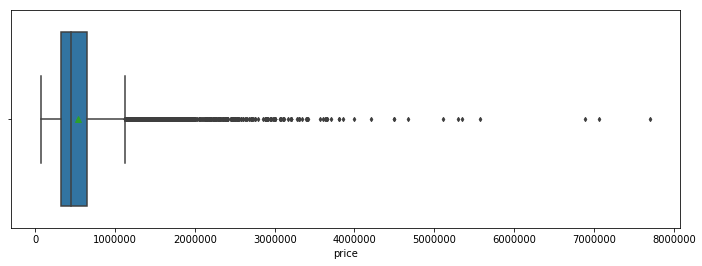

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns
fig, ax = plt.subplots(figsize=(12,4))
sns.boxplot(x = 'price', data = data, orient = 'h', width = 0.8, fliersize = 3, showmeans=True, ax = ax)
plt.show()

## Step 5 working on relationshiop of input /output vaiables

Let's analyze now the relationship between the independent variables available in the dataset and the dependent variable that we are trying to predict (i.e., price). These analysis should provide some interesting insights for our regression models.

We'll be using scatterplots and correlations coefficients (e.g., Pearson, Spearman) to explore potential associations between the variables.

### 5.1 Continuous Variables

For example, let's analyze the relationship between the square footage of a house (sqft_living) and its selling price. Since the two variables are measured on a continuous scale, we can use Pearson's coefficient r to measures the strength and direction of the relationship.

In [33]:
#sns.jointplot(x="sqft_living", y="price", data=data, kind = 'reg', size = 7)
#sns.jointplot(x="sqft_lot", y="price", data=data, kind = 'reg', size = 5)
#sns.jointplot(x="sqft_above", y="price", data=data, kind = 'reg', size = 5)
sns.jointplot(x="sqft_basement", y="price", data=data, kind = 'reg', size = 5)
#sns.jointplot(x="sqft_living15", y="price", data=data, kind = 'reg', size = 5)
#sns.jointplot(x="sqft_lot15", y="price", data=data, kind = 'reg', size = 5)
#sns.jointplot(x="yr_built", y="price", data=data, kind = 'reg', size = 5)
sns.jointplot(x="yr_renovated", y="price", data=data, kind = 'reg', size = 5)
#sns.jointplot(x="lat", y="price", data=data, kind = 'reg', size = 5)
#sns.jointplot(x="long", y="price", data=data, kind = 'reg', size = 5)
plt.show()



NameError: name 'sns' is not defined



sqft_lot, sqft_lot15 and yr_built seem to be poorly related to price.

We can see that there is a lot of zeros in the sqft_basement distribution (i.e., no basement). Similarly, there is a lot of zeros in the yr_renovated variable.

Let's rerun the association tests for these two variables without the zeros.


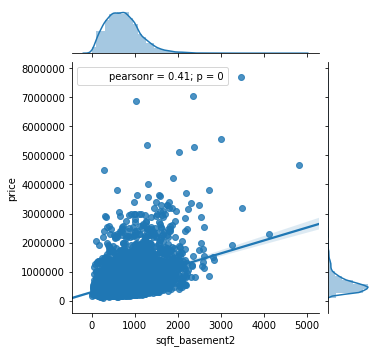

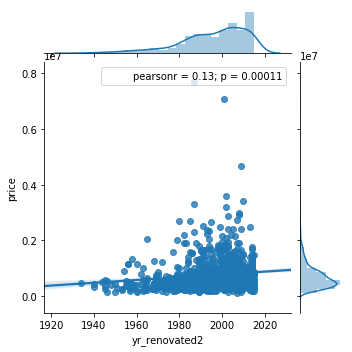

In [6]:


# Create 2 new columns for the analysis 
data['sqft_basement2'] = data['sqft_basement'].apply(lambda x: x if x > 0 else None)
data['yr_renovated2'] = data['yr_renovated'].apply(lambda x: x if x > 0 else None)

# Show the new plots with paerson correlation
sns.jointplot(x="sqft_basement2", y="price", data=data, kind = 'reg', dropna=True, size = 5)
sns.jointplot(x="yr_renovated2", y="price", data=data, kind = 'reg', dropna=True, size = 5)
plt.show()






The house price is moderately correlated with the size of the basement (if basement present). There is also a small correlation with the year of the renovation (if renovated).

It might be more interesting for our analysis to classify basement and renovation as dichotomous variables (e.g., 0 for no basement, 1 for basement present). Let's create two new columns in our dataset.


In [ ]:
data['basement_present'] = data['sqft_basement'].apply(lambda x: 1 if x > 0 else 0)
data['basement_present'] = data['basement_present'].astype('category', ordered = False)

data['renovated'] = data['yr_renovated'].apply(lambda x: 1 if x > 0 else 0)
data['renovated'] = data['renovated'].astype('category', ordered = False)




We will analyse these new variables as categorical (see in few cells below).

But first, let's go back to the plots above and the two variables: sqft_above and sqft_living15. They seem to be strongly related to price. Let's analyse their associations (along with sqft_living) using the pairgrid() function from seaborn. This function creates a matrix of axes and shows the relationship for each pair of the selected variables.

We will draw the univariate distribution of each variable on the diagonal Axes, and the bivariate distributions using scatterplots on the upper diagonal and kernel density estimation on the lower diagonal. We will create a function to display the paerson coefficient of each pair.


C:\Users\jobre\Anaconda3\lib\site-packages\matplotlib\contour.py:967: UserWarning: The following kwargs were not used by contour: 'label', 'color'
  s)


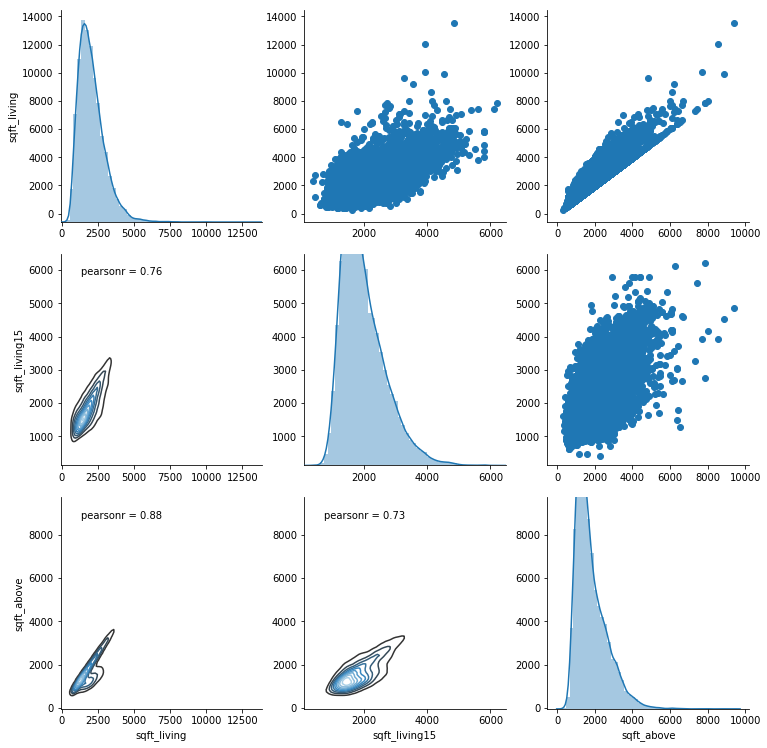

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats, linalg


# define a function to display pearson coefficients on the lower graphs 
def corrfunc(x, y, **kws):
    r, _ = stats.pearsonr(x, y)
    ax = plt.gca()
    ax.annotate("pearsonr = {:.2f}".format(r),
                xy=(.1, .9), xycoords=ax.transAxes)

g = sns.PairGrid(data, vars = ['sqft_living', 'sqft_living15', 'sqft_above'], size = 3.5) # define the pairgrid
g.map_upper(plt.scatter) 
g.map_diag(sns.distplot)
g.map_lower(sns.kdeplot, cmap="Blues_d")
g.map_lower(corrfunc)
plt.show()



### 5.12 Look in categorical variables

<IPython.core.display.Javascript object>


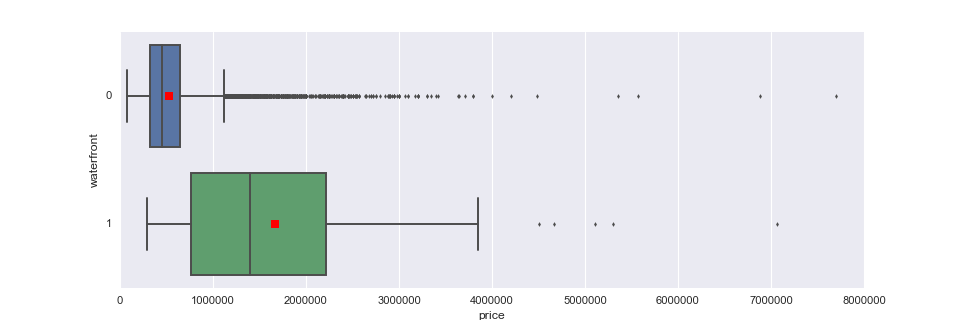

point biserial correlation r is 0.266369434031 with p = 0.0


<IPython.core.display.Javascript object>


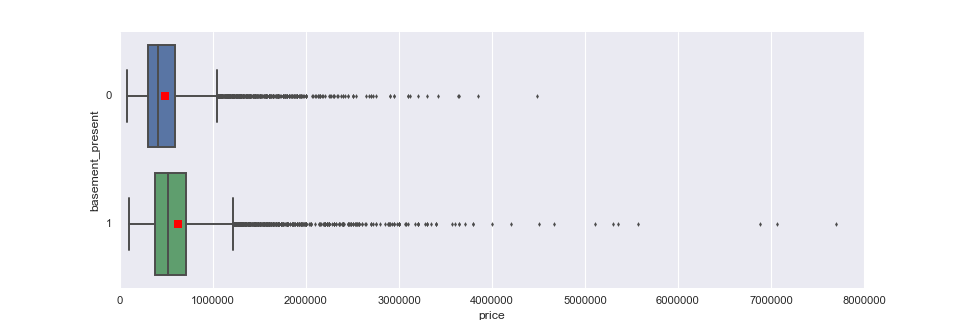

point biserial correlation r between price and basement_present is 0.18023008665 with p = 3.2567787362e-157


<IPython.core.display.Javascript object>


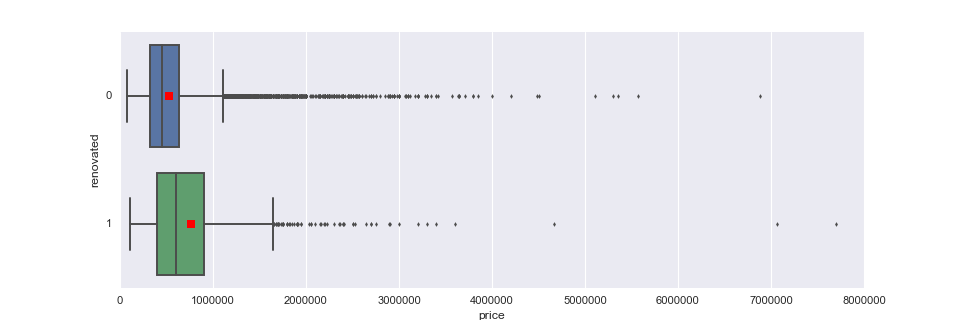


point biserial correlation r between price and renovated is 0.126092262711 with p = 2.64014859177e-77


In [13]:

%matplotlib notebook
# Let's show boxplots first
fig, ax = plt.subplots(figsize=(12,4))
sns.boxplot(y = 'waterfront', x = 'price', data = data,width = 0.8,orient = 'h', showmeans = True, fliersize = 3, ax = ax)
plt.show()

# Calculate the correlation coefficient
r, p = stats.pointbiserialr(data['waterfront'], data['price'])
print ('point biserial correlation r is %s with p = %s' %(r,p))




# basement_present variable
fig, ax = plt.subplots(figsize=(12,4))
sns.boxplot(y = 'basement_present', x = 'price', data = data,width = 0.8,orient = 'h', showmeans = True, fliersize = 3, ax = ax)
plt.show()
r, p = stats.pointbiserialr(data['basement_present'], data['price'])
print ('point biserial correlation r between price and basement_present is %s with p = %s' %(r,p))

# renovated variable
fig, ax = plt.subplots(figsize=(12,4))
sns.boxplot(y = 'renovated', x = 'price', data = data,width = 0.8,orient = 'h', showmeans = True, fliersize = 3, ax = ax)
print ('')
plt.show()
r, p = stats.pointbiserialr(data['renovated'], data['price'])
print ('point biserial correlation r between price and renovated is %s with p = %s' %(r,p))






Associations exist but they are fairly small (0.1 < r < 0.3).

Let's move on to our ordinal variables and asses their association with house price. We will show the distribution of the categories of each variable using boxplo

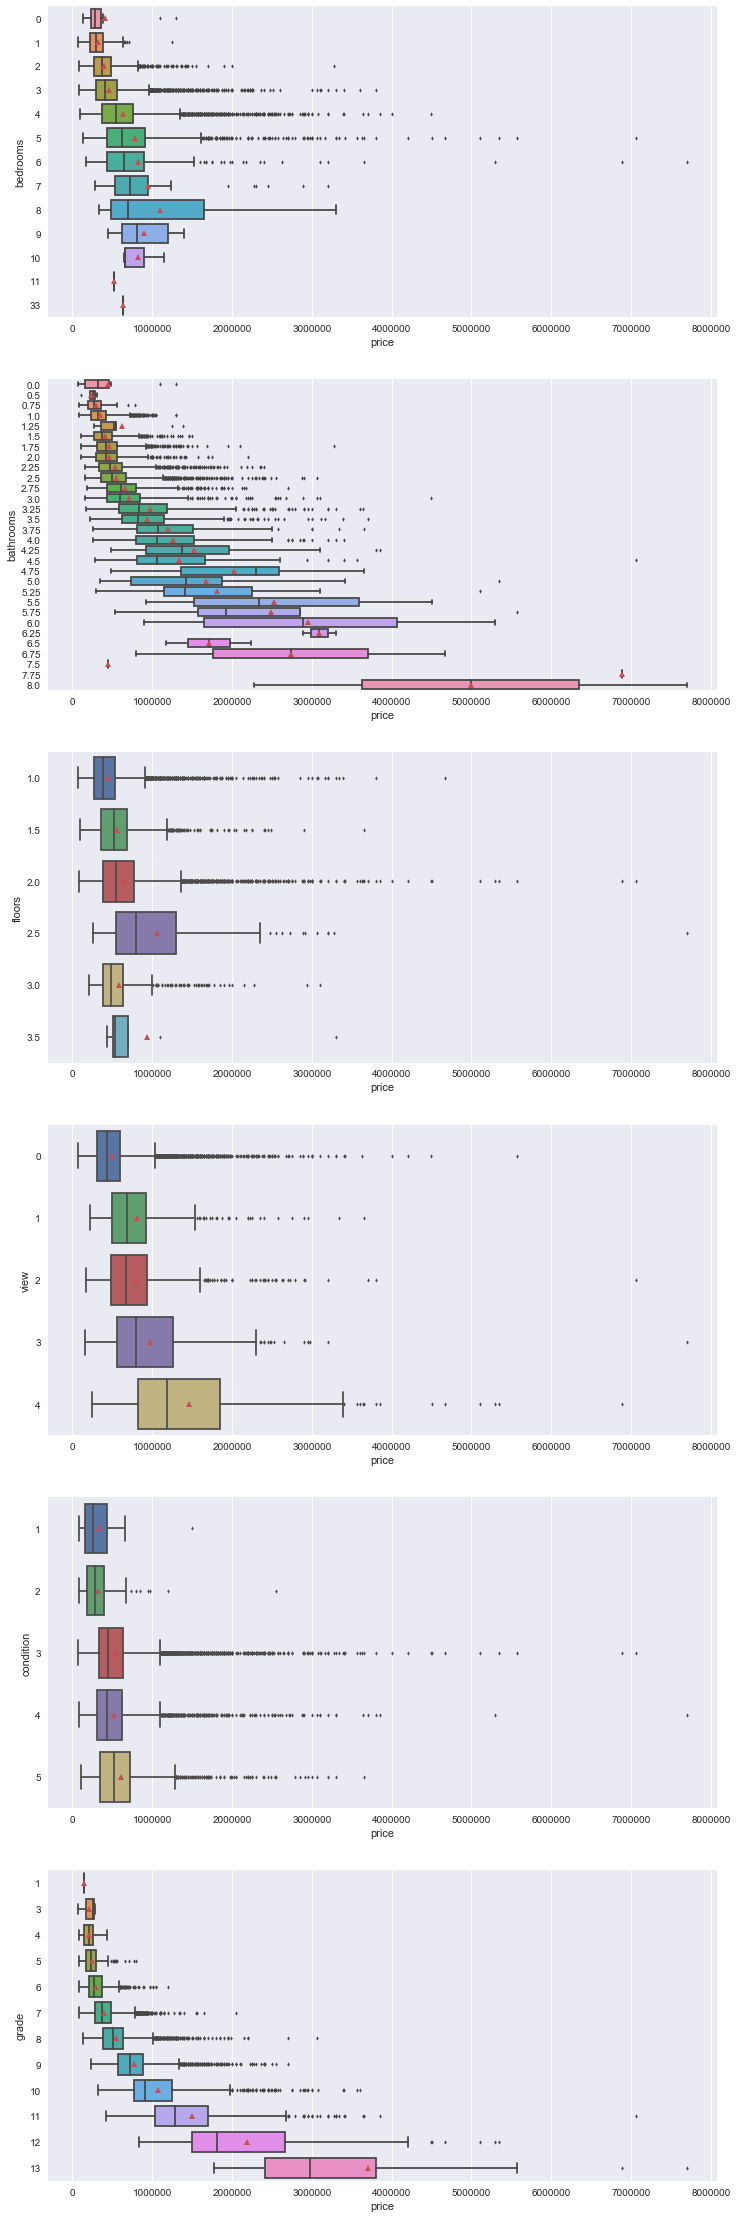

spearman correlation r between price and bedrooms is 0.34465237096 with p = 0.0
spearman correlation r between price and bathrooms is 0.497160350811 with p = 0.0
spearman correlation r between price and floors is 0.322346550036 with p = 0.0
spearman correlation r between price and view is 0.29393116417 with p = 0.0
spearman correlation r between price and condition is 0.0184899583013 with p = 0.00656082840655
spearman correlation r between price and grade is 0.658215221426 with p = 0.0


In [6]:


fig, axarr = plt.subplots(6, figsize=(12,40))
sns.boxplot(y = 'bedrooms', x = 'price', data = data,width = 0.8,orient = 'h', showmeans = True, fliersize = 3, ax = axarr[0])
sns.boxplot(y = 'bathrooms', x = 'price', data = data,width = 0.8,orient = 'h', showmeans = True, fliersize = 3, ax = axarr[1])
sns.boxplot(y = 'floors', x = 'price', data = data,width = 0.8,orient = 'h', showmeans = True, fliersize = 3, ax = axarr[2])
sns.boxplot(y = 'view', x = 'price', data = data,width = 0.8,orient = 'h', showmeans = True, fliersize = 3, ax = axarr[3])
sns.boxplot(y = 'condition', x = 'price', data = data,width = 0.8,orient = 'h', showmeans = True, fliersize = 3, ax = axarr[4])
sns.boxplot(y = 'grade', x = 'price', data = data,width = 0.8,orient = 'h', showmeans = True, fliersize = 3, ax = axarr[5])
plt.show()



r, p = stats.spearmanr(data['bedrooms'], data['price'])
print ('spearman correlation r between price and bedrooms is %s with p = %s' %(r,p))
r, p = stats.spearmanr(data['bathrooms'], data['price'])
print ('spearman correlation r between price and bathrooms is %s with p = %s' %(r,p))
r, p = stats.spearmanr(data['floors'], data['price'])
print ('spearman correlation r between price and floors is %s with p = %s' %(r,p))
r, p = stats.spearmanr(data['view'], data['price'])
print ('spearman correlation r between price and view is %s with p = %s' %(r,p))
r, p = stats.spearmanr(data['condition'], data['price'])
print ('spearman correlation r between price and condition is %s with p = %s' %(r,p))
r, p = stats.spearmanr(data['grade'], data['price'])
print ('spearman correlation r between price and grade is %s with p = %s' %(r,p))





There is indeed associations between these variables and the house price (except for condition). grade seems to be the best indicator.

### Conclusion

The relationship between the output variable (house price) and the dependent variables in our dataset.

More specifically, we highlighted that:

    sqft_living, sqft_above and sqft_basement were moderately/strongly associated with price. Paerson r was equal to 0.70, 0.61 and 0.41, respectively. The 3 variables were also strongly related to each other as sqft_living = sqft_above and sqft_basement.
    sqft_living15, the average house square footage of the 15 closest neighbors, was also strongly related to price (r = 0.59) . However, when controlling for sqft_living, the relationship disappeared (r=0.06).
    
    sqft_lot, sqft_lot15 (average lot size of the 15 closest houses) and yr_built were poorly related to price.
    The three dichotomous variables (waterfront, basement_present, renovated) were associated with price. The associations were small (r < 0.3)
    Five of the ordinal parameters (bedrooms, bathrooms, floors, views, grade) were also moderately to strongly associated with price.

